In [34]:
using JLD
using PyPlot
using Statistics, StatsBase
using Clustering

In [35]:
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools

In [36]:
nombrecm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
archivo=load(nombrecm)
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];
evocada=false
nmax=length(DatosCMP)

2000

In [37]:
# Datos ordenados 4dimensionalmente.
# vamos a usar masa maxima y tiempo maximo normalizados a 64 (dist max.)
# para hacer un hipercubo platonico y hacer el apiñonamiento jerárquico ahi.

fruncio=Array{Float64}(undef, 0,4)

for k in keys(DatosCMP)
    dat=DatosCMP[k]
    (alto, ancho)=size(dat)
    auxt=ones(alto).*k
    afafa=hcat(dat, auxt)
    fruncio=vcat(fruncio,afafa)
end

In [38]:
masamax=maximum(fruncio[:,3])

12329.550282478333

In [39]:
nmax=maximum(fruncio[:,4])

2000.0

In [40]:
xx=fruncio[:,1]
yy=fruncio[:,2]
gordis=fruncio[:,3]
nn=fruncio[:,4];

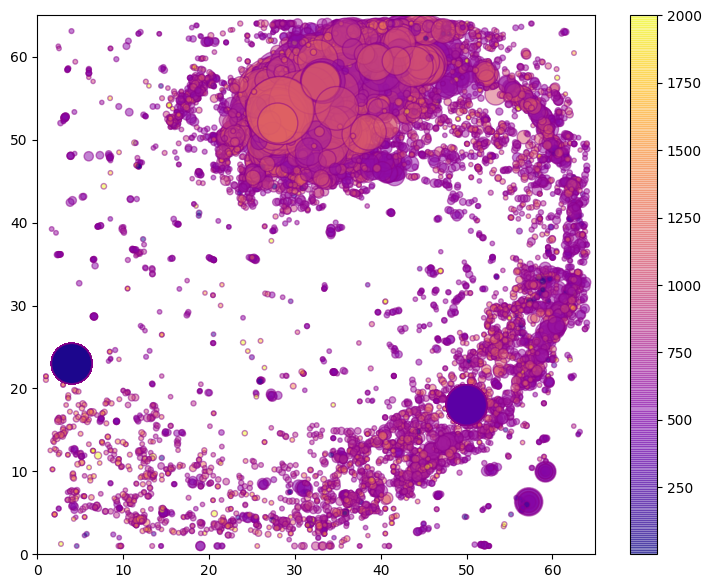

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa9cac15940>

In [103]:
figure(figsize=(9,7))
        
xx=fruncio[:,1]
yy=fruncio[:,2]
gordis=fruncio[:,3]
nn=fruncio[:,4];
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)

scatter(xx,yy, s=0.25*gordis, edgecolors="darkmagenta", c=nn, cmap="plasma")
colorbar()

In [85]:
nquantile(gordis, 10)

11-element Array{Float64,1}:
    36.039523124694824
    44.14244441986084 
    50.468441772460935
    57.868412208557125
    69.35231952667236 
    85.08032131195068 
   110.935068321228   
   185.62007904052726 
   547.0982301712038  
  3326.5903381347653  
 12329.550282478333   

In [95]:
frunciofiltrado=fruncio[fruncio[:,3].<44.142,:]


981×4 Array{Float64,2}:
 11.5064    3.4862   43.3552  1316.0
 33.9613   62.5257   38.6351  1333.0
  9.4953   11.5041   38.294   1265.0
 31.295    60.7513   42.7274  1265.0
 10.5144   32.037    42.3055  1481.0
 41.9712   10.5049   40.634   1124.0
 23.5228   50.0258   41.8387  1273.0
 21.0152   46.5128   38.5891  1273.0
 36.5267   56.496    40.9731  1791.0
 33.2395   50.7369   36.8584  1400.0
 38.4529   14.5331   44.0531  1327.0
  3.56885  12.0      41.8003  1327.0
  1.99694  14.0202   37.3973  1374.0
  ⋮                                 
 14.2295   13.7595   44.0099   781.0
 17.7673    4.76606  39.1629   813.0
 25.3707    6.75534  43.4632  1287.0
 46.0168   19.4868   37.0739  1287.0
 40.4504   53.4589   41.4464  1287.0
 42.4693    6.9843   43.6575   632.0
 38.5484    5.0      44.0906   632.0
 48.3777   63.784    41.3144  1296.0
 33.4671    8.04065  39.3922  1140.0
 23.4303   52.9974   42.0014  1140.0
 40.0727    7.14418  42.0553  1241.0
 20.5514   50.0248   42.9205  1241.0

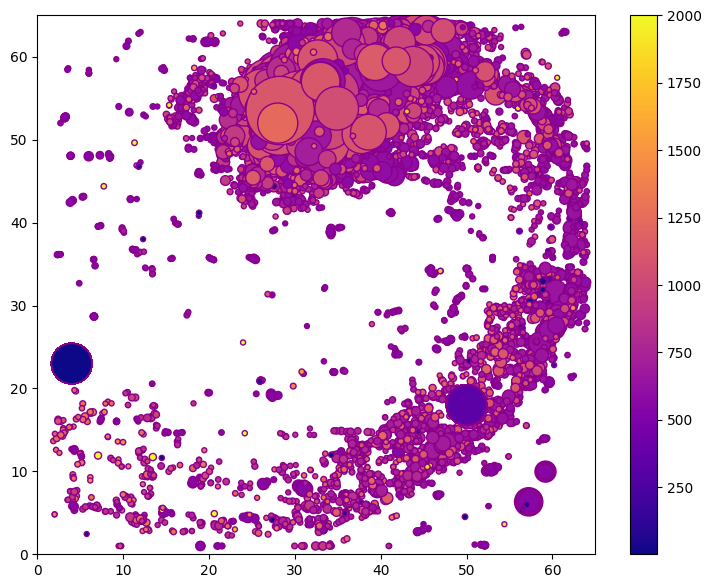

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa9ad16e4e0>

In [117]:
figure(figsize=(9,7))
    
frunciofiltrado=fruncio[fruncio[:,3].>50.5,:]

xx=frunciofiltrado[:,1]
yy=frunciofiltrado[:,2]
gordis=frunciofiltrado[:,3]
nn=frunciofiltrado[:,4];
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)

scatter(xx,yy, s=0.25*gordis, edgecolors="darkmagenta", c=nn, cmap="plasma")
colorbar()


In [100]:
size(frunciofiltrado)

(7873, 4)

In [101]:
# clust1=fruncio[:,1:2];
clust1=permutedims(frunciofiltrado)

4×7873 Array{Float64,2}:
   49.9978    31.7893    10.2865   …    28.0012    44.7566    49.9984
   18.0004    60.9192     7.00301       51.9968    54.6292    17.9983
 3355.89      82.6364    81.8873      3339.65      85.3075  3345.59  
  306.0     1316.0     1316.0         1241.0     1241.0      322.0   

In [104]:
function normalizar1(xx::Array)
    norma=maximum(abs.(xx))
    result=xx./norma
    return result
end

normalizar1 (generic function with 1 method)

In [105]:
clust1[3,:]=normalizar1(clust1[3,:]).*64
clust1[4,:]=normalizar1(clust1[4,:]).*64

7873-element Array{Float64,1}:
  9.792
 42.112
 42.112
 42.656
 42.656
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
  ⋮    
 33.344
 33.344
 33.344
 33.344
 33.344
 49.12 
 39.712
 39.712
 39.712
 39.712
 39.712
 10.304

In [107]:
using Distances

In [108]:
clustspaciotiempo=vcat(clust1[1:2,:], transpose(clust1[4,:]))

3×7873 Array{Float64,2}:
 49.9978  31.7893  10.2865   38.625   …  25.233   28.0012  44.7566  49.9984
 18.0004  60.9192   7.00301  63.6998     55.7956  51.9968  54.6292  17.9983
  9.792   42.112   42.112    42.656      39.712   39.712   39.712   10.304 

In [109]:
dd4d=pairwise(Euclidean(), clust1);

In [110]:
dd3d=pairwise(Euclidean(), clustspaciotiempo);
dd2d=pairwise(Euclidean(), clust1[1:2,:]);

In [111]:
clust1[4,:]

7873-element Array{Float64,1}:
  9.792
 42.112
 42.112
 42.656
 42.656
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
  ⋮    
 33.344
 33.344
 33.344
 33.344
 33.344
 49.12 
 39.712
 39.712
 39.712
 39.712
 39.712
 10.304

In [112]:
h4d=hclust(dd4d)
h3d=hclust(dd3d)
h2d=hclust(dd2d)

Hclust{Float64}([-1624 -2881; -2792 -5749; … ; -3711 7870; 4644 7871], [9.36836e-6, 1.08421e-5, 2.18722e-5, 2.27687e-5, 2.388e-5, 2.38943e-5, 2.3937e-5, 2.90832e-5, 3.26346e-5, 3.26485e-5  …  4.10886, 4.10906, 4.28125, 4.40309, 4.51278, 4.68463, 4.93391, 4.94627, 4.98157, 6.204], [4981, 850, 3776, 3711, 4541, 1869, 1350, 4527, 709, 3206  …  135, 5910, 3738, 656, 1105, 1516, 5109, 3295, 1074, 7124], :single)

In [113]:
nivel=1000
hcorta=0.5
clust4d=cutree(h4d,h=hcorta)
clust3d=cutree(h3d,h=hcorta)
clust2d=cutree(h2d,h=hcorta);

In [149]:
unique(clust4d)

3764-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 3753
 3754
 3755
 3756
 3757
 3758
 3759
 3760
 3761
 3762
 3763
 3764

9840-element Array{Float64,1}:
 49.99783396432153 
 31.789303104218565
 11.506428225796482
 10.28649529810764 
 38.6250320269803  
 44.63629718841954 
 33.96127021598314 
 32.98885020017239 
 50.84303391275158 
 44.76027819665408 
 35.82354111671744 
 28.229531414558387
 35.86076751420068 
  ⋮                
 34.87730769875987 
 30.80146154358195 
 51.37898770248469 
 36.02040135758369 
 15.204587869028044
 25.23297083479272 
  8.037613756054897
 40.07269491845895 
 28.001215422532038
 20.551352400114528
 44.75657321160427 
 49.99839844320536 

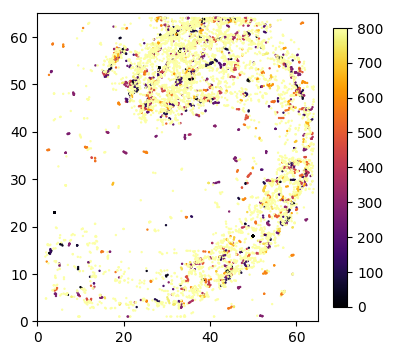

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa9ad119518>

In [118]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust4d, cmap="inferno", vmin=0, vmax=800)
colorbar(fraction=0.045)

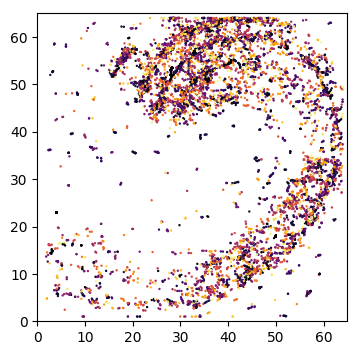

PyObject <matplotlib.collections.PathCollection object at 0x7fa9ad0930f0>

In [119]:
fafa=figure(figsize=(4,4))
#axis("equal")
#ax = fafa.add_subplot(111, projection="3d")
xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust3d, cmap="inferno")
#colorbar(fraction=0.045)

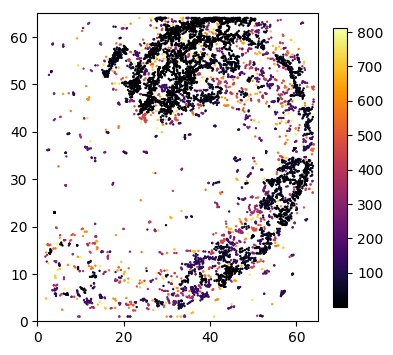

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa9ad01ab70>

In [120]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust2d, cmap="inferno")
colorbar(fraction=0.045)

In [121]:
function filtraclusterchicos(puntos::Array, clustree, umbral)
    tabla=hcat(puntos,clustree)
    valores=unique(clustree)
    dd=Dict([(i,count(x->x==i,clustree)) for i in valores])
    predicado(j)=dd[j]>umbral
    result=tabla[map(x->predicado(x), clustree),:]
    (clusterfuck, cual)=findmax(dd)
    println("el cluster mayor tiene ",clusterfuck, " elementos, es el ", cual)
    return result
end

function filtraclusterchicos(puntos::Dict, umbral)
    # no solo aqui ya estan separados por dicctionario, sino tambien
    # en "electrodos", es decir numeros enteros
   result=Dict{Int, Set}()
    for k in keys(puntos)
        if length(puntos[k])>umbral
            result[k]=puntos[k]
        end
    end
    return result
end

filtraclusterchicos (generic function with 2 methods)

In [123]:
function declustaset(puntosyclust::Array)
    result=Dict{Int,Set}()
    clustnames=unique(puntosyclust[:,5])
    for q in clustnames
        subt=puntosyclust[puntosyclust[:,5].==q,:]
        punt=rowstoset(round.(Int64,subt[:,1:2]))
        qindez=round(Int64,q)
        result[qindez]=punt
    end
    return result
end

declustaset (generic function with 1 method)

In [145]:
temp=hcat(frunciofiltrado, clust4d)
dict4d=declustaset(temp)
blabla=filtraclusterchicos(dict4d, 2)

Dict{Int64,Set} with 109 entries:
  329  => Set(Array{Int64,2}[[57 24], [58 23], [58 24]])
  2    => Set(Array{Int64,2}[[32 60], [31 61], [32 61]])
  306  => Set(Array{Int64,2}[[63 45], [62 44], [64 45], [62 45]])
  267  => Set(Array{Int64,2}[[61 52], [60 53], [60 52]])
  520  => Set(Array{Int64,2}[[25 48], [26 47], [26 48]])
  1993 => Set(Array{Int64,2}[[63 42], [62 42], [62 41]])
  46   => Set(Array{Int64,2}[[38 47], [38 46], [37 47]])
  2299 => Set(Array{Int64,2}[[42 15], [43 15], [42 16]])
  144  => Set(Array{Int64,2}[[32 61], [33 61], [33 62]])
  391  => Set(Array{Int64,2}[[62 32], [62 31], [63 31], [63 32]])
  155  => Set(Array{Int64,2}[[48 12], [49 13], [48 13]])
  8    => Set(Array{Int64,2}[[45 11], [44 11], [45 10], [44 10], [45 12]])
  1133 => Set(Array{Int64,2}[[17 55], [17 54], [18 55], [18 56]])
  333  => Set(Array{Int64,2}[[59 51], [59 52], [59 53], [60 51]])
  296  => Set(Array{Int64,2}[[54 20], [53 20], [53 21]])
  709  => Set(Array{Int64,2}[[52 27], [53 28], [53 29], [

In [142]:
#funcion solo para plotear, no se si luego la vas a usar.
function dictatabla(dict::Dict)
    aux=[0 0 0]
    for q in keys(dict)
        aux2=[0 0]
        for renglon in dict[q]
            aux2=vcat(aux2, renglon)
        end
        (l,k)=size(aux2)
        columnaextra=ones(Int64, l).*q
        aux3=hcat(aux2, columnaextra)
        aux=vcat(aux, aux3)
    end
    return aux[2:end,:]
end

dictatabla (generic function with 1 method)

In [146]:
blatabla=dictatabla(blabla)

461×3 Array{Int64,2}:
  0   0   329
 57  24   329
 58  23   329
 58  24   329
  0   0     2
 32  60     2
 31  61     2
 32  61     2
  0   0   306
 63  45   306
 62  44   306
 64  45   306
 62  45   306
  ⋮          
  0   0  1365
 45  55  1365
 45  54  1365
 44  55  1365
  0   0    97
 22  49    97
 23  49    97
 22  48    97
  0   0  1820
 50  20  1820
 50  19  1820
 51  20  1820

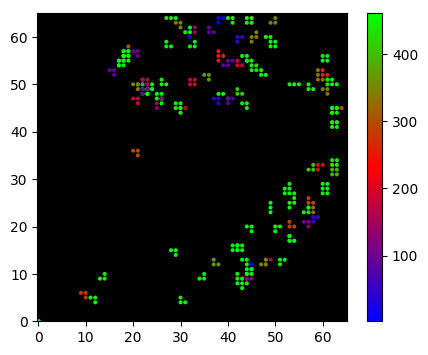

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa9acd4f198>

In [150]:
fafa=figure(figsize=(5,4))

ax=gca()
ax.set_facecolor("k")
axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(blatabla[:,1], blatabla[:,2], c=blatabla[:,3], s=3.5, cmap="brg", vmax=461)
colorbar()

In [132]:
for q in keys(blabla) 
    println(q, " ", length(blabla[q]))
end

167 5
50 18
32 7
81 5
140 6
143 5
2 265
62 5
11 19
39 22
21 41
46 13
26 6
337 5
43 9
55 11
60 6
130 18
162 5
8 28
49 5
6 5
24 22
221 5
139 5
5 24
38 5
57 13
20 19
45 20
23 9
13 20
159 5
449 5
27 29
48 26
56 5
15 6
30 19


In [85]:
decl=declustaset(blabla)

Dict{Int64,Set} with 17 entries:
  2  => Set(Array{Int64,2}[[42 61], [30 53], [31 56], [29 53], [30 56], [40 59]…
  11 => Set(Array{Int64,2}[[49 59], [48 60]])
  10 => Set(Array{Int64,2}[[52 58], [53 58]])
  35 => Set(Array{Int64,2}[[27 53], [27 52], [26 52], [28 52]])
  55 => Set(Array{Int64,2}[[23 50], [23 51]])
  66 => Set(Array{Int64,2}[[29 46], [29 47], [30 47], [30 46], [31 47]])
  8  => Set(Array{Int64,2}[[31 53], [31 52], [32 52]])
  22 => Set(Array{Int64,2}[[25 45], [26 46], [25 46]])
  6  => Set(Array{Int64,2}[[4 23]])
  51 => Set(Array{Int64,2}[[25 52], [24 52], [24 53], [25 53]])
  4  => Set(Array{Int64,2}[[32 50], [30 47], [32 49], [30 48], [31 49], [33 49]…
  3  => Set(Array{Int64,2}[[37 63], [39 63], [35 62], [40 64], [36 63], [38 64]…
  5  => Set(Array{Int64,2}[[38 55], [37 53], [37 55], [37 54], [38 54], [39 55]…
  14 => Set(Array{Int64,2}[[45 61], [45 59], [43 60], [45 60], [44 60]])
  27 => Set(Array{Int64,2}[[47 60], [47 59], [46 59], [46 60]])
  15 => Set(Array{Int

In [87]:
decl[2]

Set(Array{Int64,2}[[42 61], [30 53], [31 56], [29 53], [30 56], [40 59], [38 60], [28 53], [39 60], [28 54]  …  [26 49], [42 60], [36 61], [34 59], [28 49], [37 60], [27 49], [27 50], [41 59], [27 51], [28 48]])

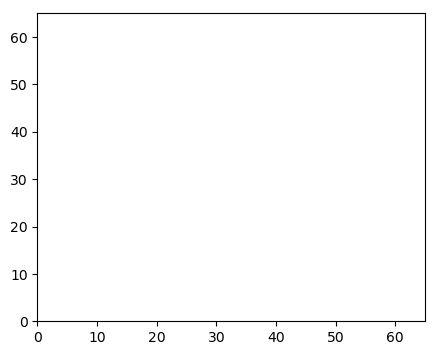

2 cubre 68electrodos. 
11 cubre 2electrodos. 
10 cubre 2electrodos. 
35 cubre 4electrodos. 
55 cubre 2electrodos. 
66 cubre 5electrodos. 
8 cubre 3electrodos. 
22 cubre 3electrodos. 
6 cubre 1electrodos. 
51 cubre 4electrodos. 
4 cubre 16electrodos. 
3 cubre 10electrodos. 
5 cubre 7electrodos. 
14 cubre 5electrodos. 
27 cubre 4electrodos. 
15 cubre 11electrodos. 
1 cubre 1electrodos. 


In [93]:
fafa=figure(figsize=(5,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
for q in keys(decl)
 print(q, " cubre ", length(decl[q]), "electrodos. \n")
end
#colorbar()

In [90]:
pum=[0 0]
for q in decl[2]
    pum=vcat(pum, q)
end

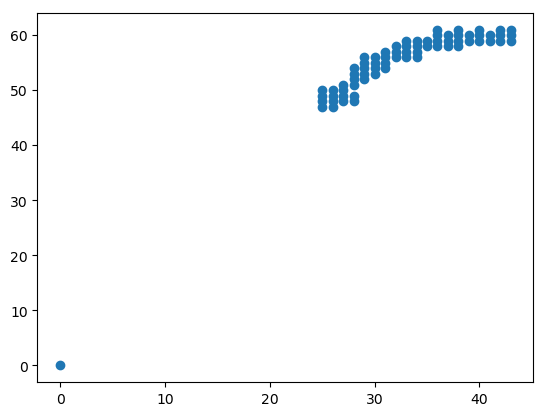

PyObject <matplotlib.collections.PathCollection object at 0x7f0a915dca20>

In [91]:
scatter(pum[:,1], pum[:,2])